# <span style="color:royalblue"><center> Problemas de los datos multinomiales </center></span>

### Con base en el Dataset de [Kaggle](https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset) de clasificación de frijoles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os

In [2]:
os.getcwd()
os.chdir('Datos')

In [3]:
beans = pd.read_csv('drybeans.csv')
beans.head(5)

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
beans.shape

(13611, 17)

In [5]:
beans['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
beans.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860154       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

### Drop duplicates

In [7]:
beans.drop_duplicates(inplace=True)
beans.shape

(13543, 17)

In [8]:
beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

### Balancear las categorías del dataset

In [9]:
df = beans.copy()

In [10]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653247  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13543 rows x 17 columns]

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'SEKER'),
  Text(1, 0, 'BARBUNYA'),
  Text(2, 0, 'BOMBAY'),
  Text(3, 0, 'CALI'),
  Text(4, 0, 'HOROZ'),
  Text(5, 0, 'SIRA'),
  Text(6, 0, 'DERMASON')])

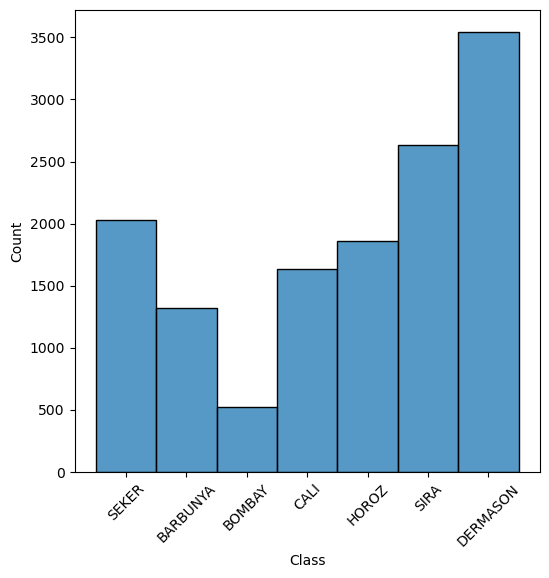

In [11]:
fig = plt.figure(figsize=(6,6))
sns.histplot(data=df['Class'])
plt.xticks(rotation=45)

### Forma 1: reducir las clases a la clase mínima
* Contra: Eliminamos valores útiles
### Forma 2: Crear datos con la misma desviación estándar y varianza; mismos parámetros para subir las gráficas a la máxima
* Contra: Creando ejemplos que no son ciertos


#### Debido a que tenemos una cantidad buena de muestras, podemos disminuirlas con respecto a la Bombay

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [13]:
undersample = RandomUnderSampler(random_state=42)

In [14]:
X = df.drop('Class',axis=1)
y = df.Class
X_over,y_over = undersample.fit_resample(X,y)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'BARBUNYA'),
  Text(1, 0, 'BOMBAY'),
  Text(2, 0, 'CALI'),
  Text(3, 0, 'DERMASON'),
  Text(4, 0, 'HOROZ'),
  Text(5, 0, 'SEKER'),
  Text(6, 0, 'SIRA')])

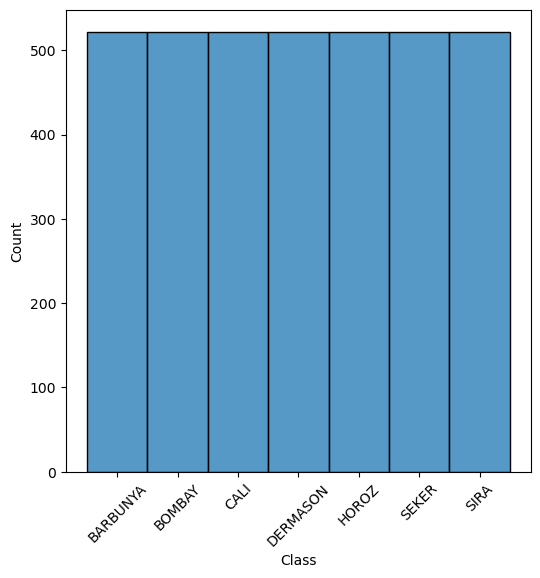

In [17]:
fig = plt.figure(figsize=(6,6))
sns.histplot(data=y_over)
plt.xticks(rotation=45)

In [19]:
df.shape

(13543, 17)

In [20]:
X_over.shape

(3654, 16)

### Paso de datos categóricos a numéricos

In [21]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [22]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
              [1,2,3,4,5,6,7],
              inplace=True)

In [23]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

## Análisis exploratorio y escalamiento de datos multiclase

In [24]:
df_dea = X_over
df_dea['Class'] = y_over

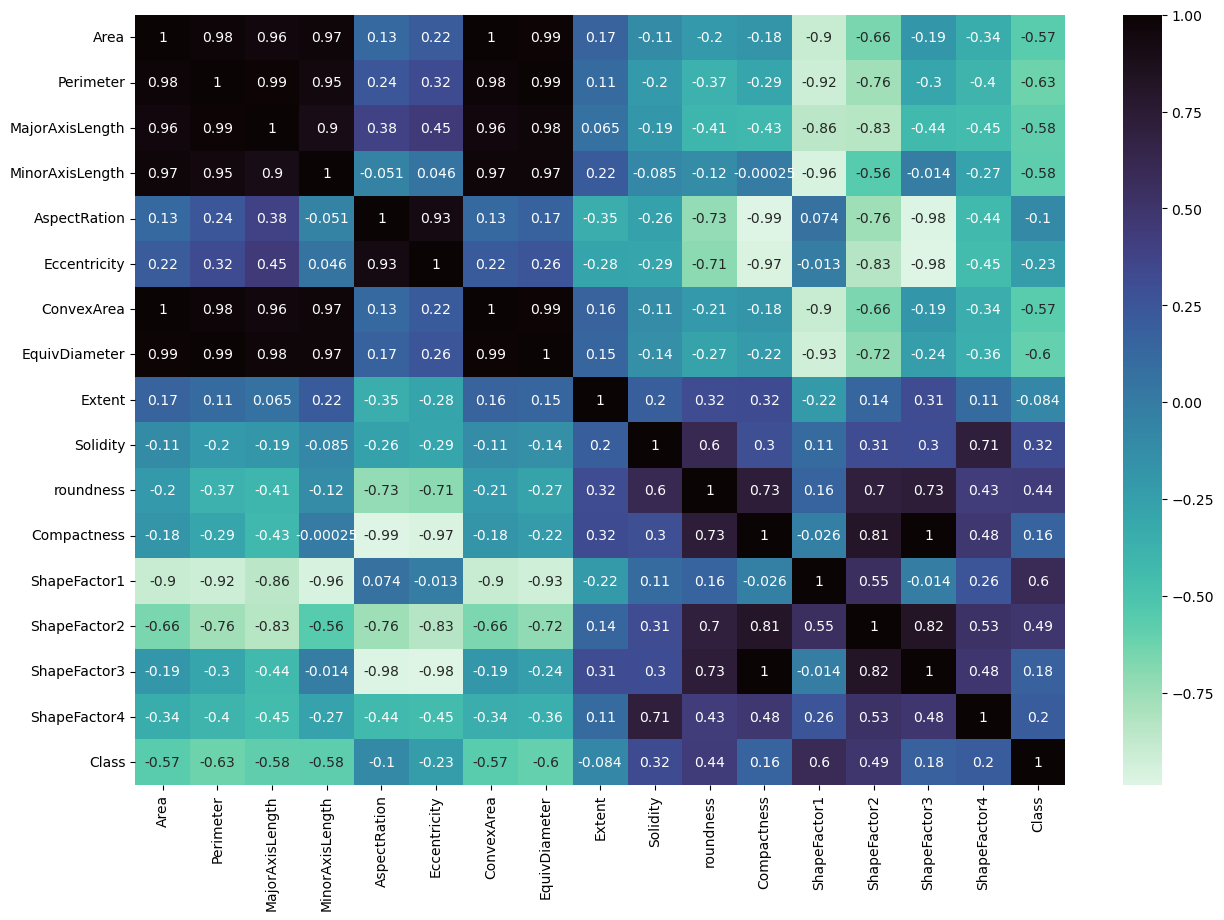

In [29]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(),annot=True,cmap='mako_r')
plt.show()

In [30]:
X_over.drop(['ConvexArea','EquivDiameter'],axis=1,inplace=True)

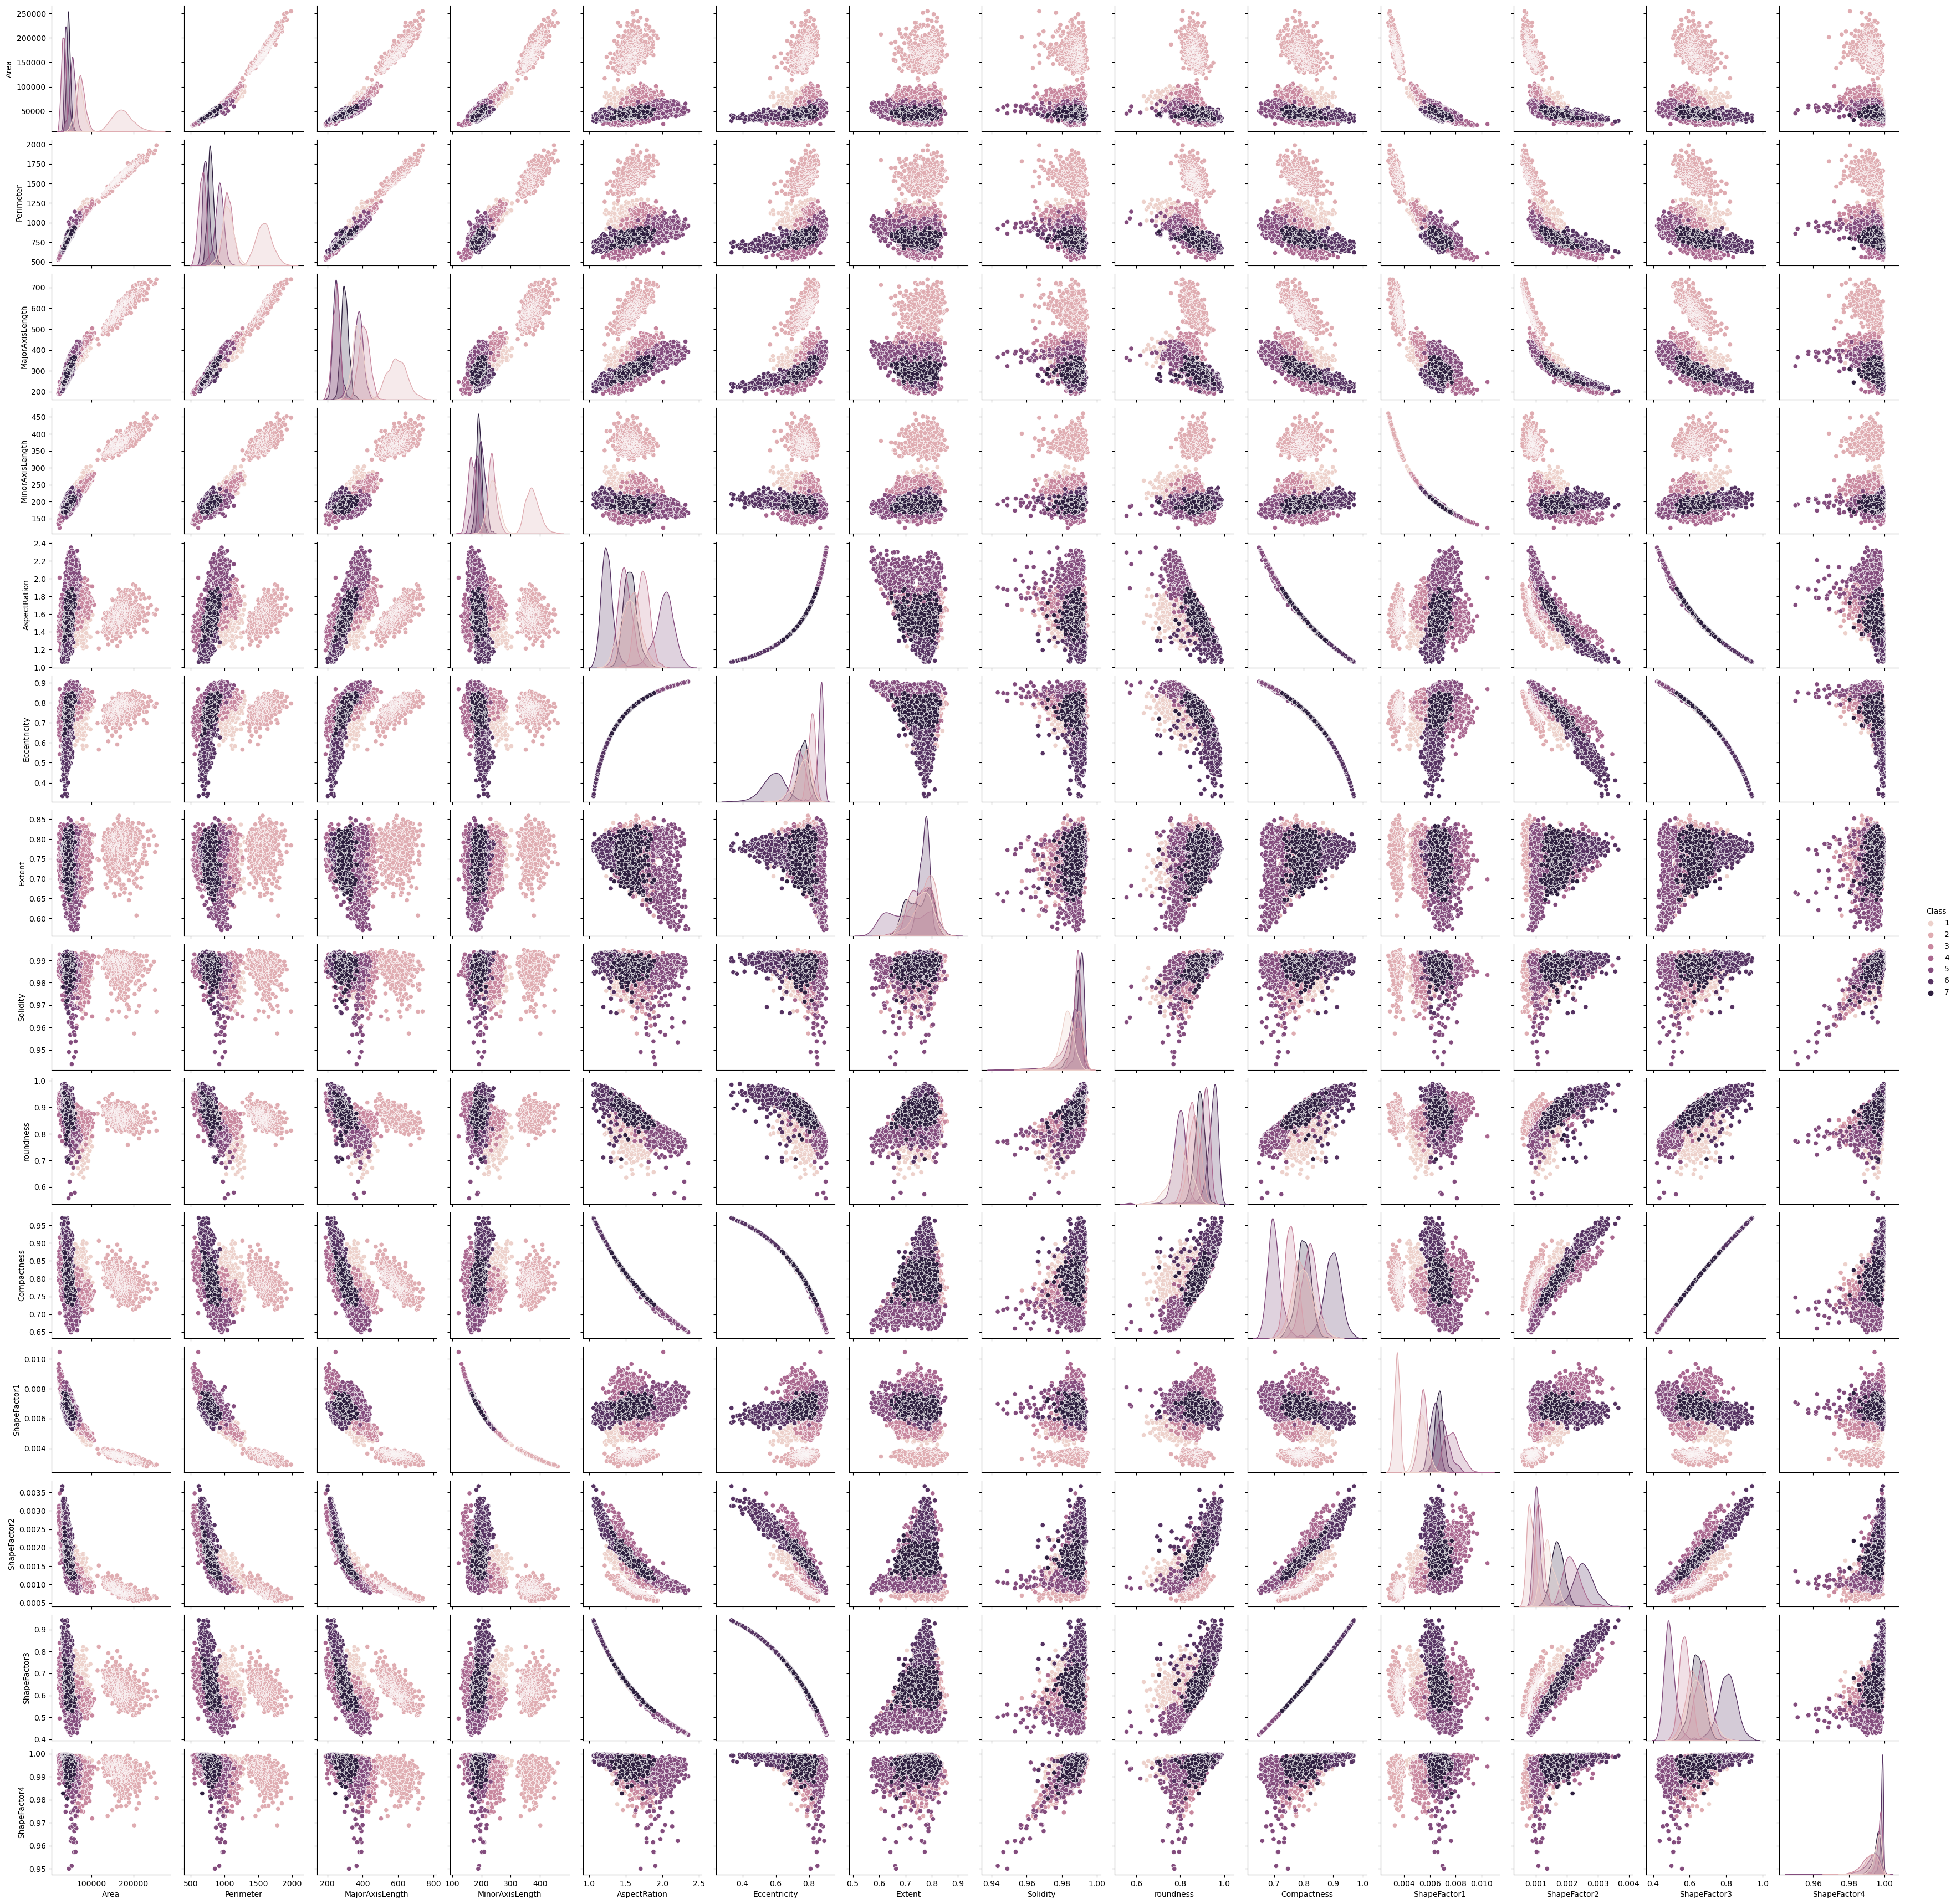

In [31]:
sns.pairplot(df_dea,hue='Class')

In [39]:
X_train,X_test, y_train,y_test = train_test_split(X_over,y_over,
                                                 random_state=42,
                                                 shuffle=True,
                                                 test_size=0.2)
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [48]:
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, 
                                                   solver= solver_, 
                                                   multi_class= multiclass_, 
                                                   n_jobs=-1, C=C_ )
    return logistic_regression_model

In [49]:
model = logistic_model(1,'saga','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  89   2]
 [  0   0   0   0   0   0 110]]
0.9931600547195623


C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [50]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:
            None    
print('----------------------------FINAL--------------------------------')

C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\linear_model\_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


----------------------------FINAL--------------------------------


C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'ovr-liblinear'),
  Text(1, 0, 'ovr-newton-cg'),
  Text(2, 0, 'ovr-lbfgs'),
  Text(3, 0, 'ovr-sag'),
  Text(4, 0, 'ovr-saga'),
  Text(5, 0, 'multinomial-newton-cg'),
  Text(6, 0, 'multinomial-lbfgs'),
  Text(7, 0, 'multinomial-sag'),
  Text(8, 0, 'multinomial-saga')])

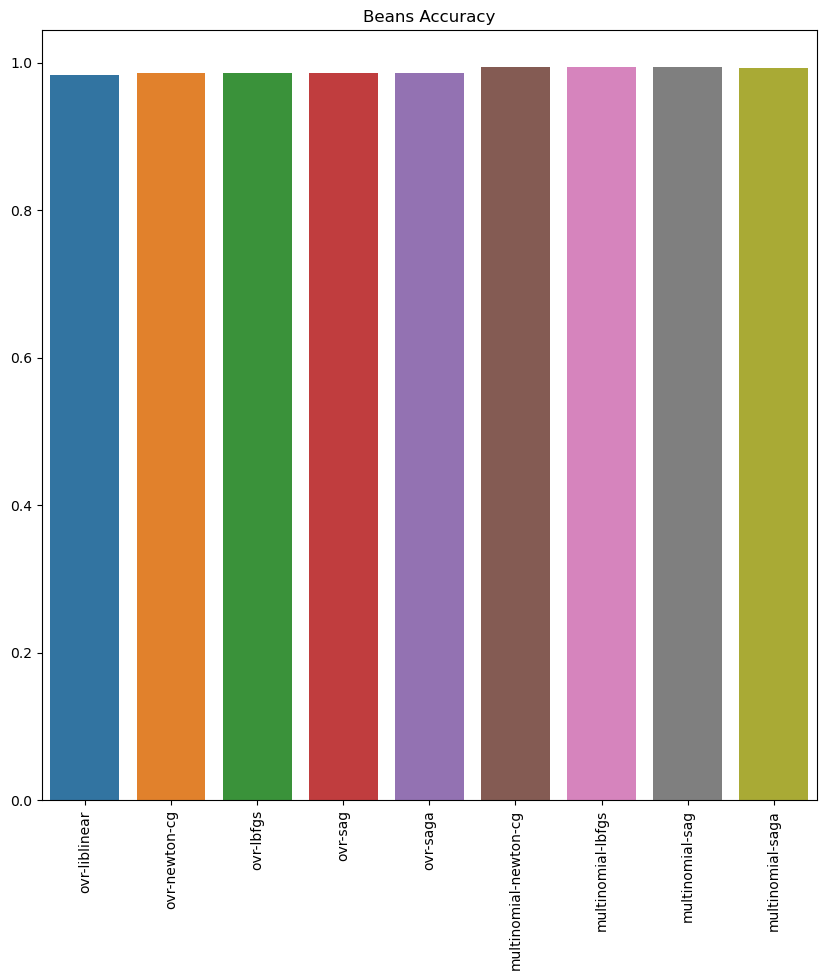

In [51]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title('Beans Accuracy')
plt.xticks(rotation=90)

### Seleccionando newton-cg multinomiL

In [52]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  90   1]
 [  0   0   0   0   0   0 110]]
0.9945280437756497


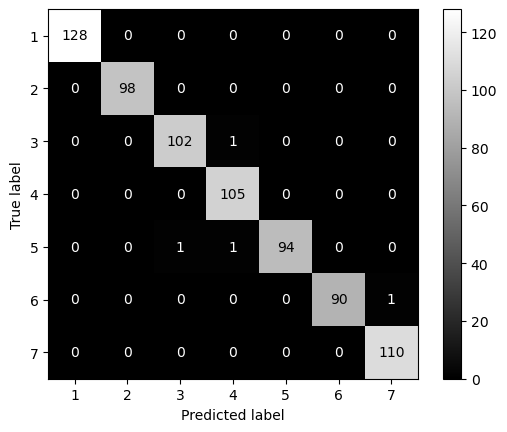

C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\Mateo\AppData\Local\Temp\joblib_memmapping_folder_4592_4ec0b6f102f949ae96b1f471a7341684_8c96c52d86314380a2fa6c0d6a931007
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\Mateo\AppData\Local\Temp\joblib_memmapping_folder_4592_da1b23f5bd044f75a58f2b3ac7320711_1e2a1ed93f314aa2ad9b73bc10b66be0
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\Mateo\anaconda3\envs\data\Lib\site-packages\joblib\_memmapping_reducer.py:611: UserWarning: Failed to delete temporary folder: C:\Users\Mateo\AppData\Local\Temp\joblib_memmapping_folder_4592_4ec0b6f102f949ae96b1f471a7341684_dfe681a61611439f99115dde545a5e22
  warnings.warn("Failed to delete temporary folder: {}"
C:\Users\Mateo\anaconda3\envs\data

In [53]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()